Bitcoin Market Cap: $1,825,748,896,903.50


/tmp/ipykernel_2708/1827786814.py:47: RuntimeWarning: divide by zero encountered in divide
  return (n * np.sin(2 * np.pi / n)) / (2 * np.pi)
/tmp/ipykernel_2708/1827786814.py:47: RuntimeWarning: invalid value encountered in sin
  return (n * np.sin(2 * np.pi / n)) / (2 * np.pi)


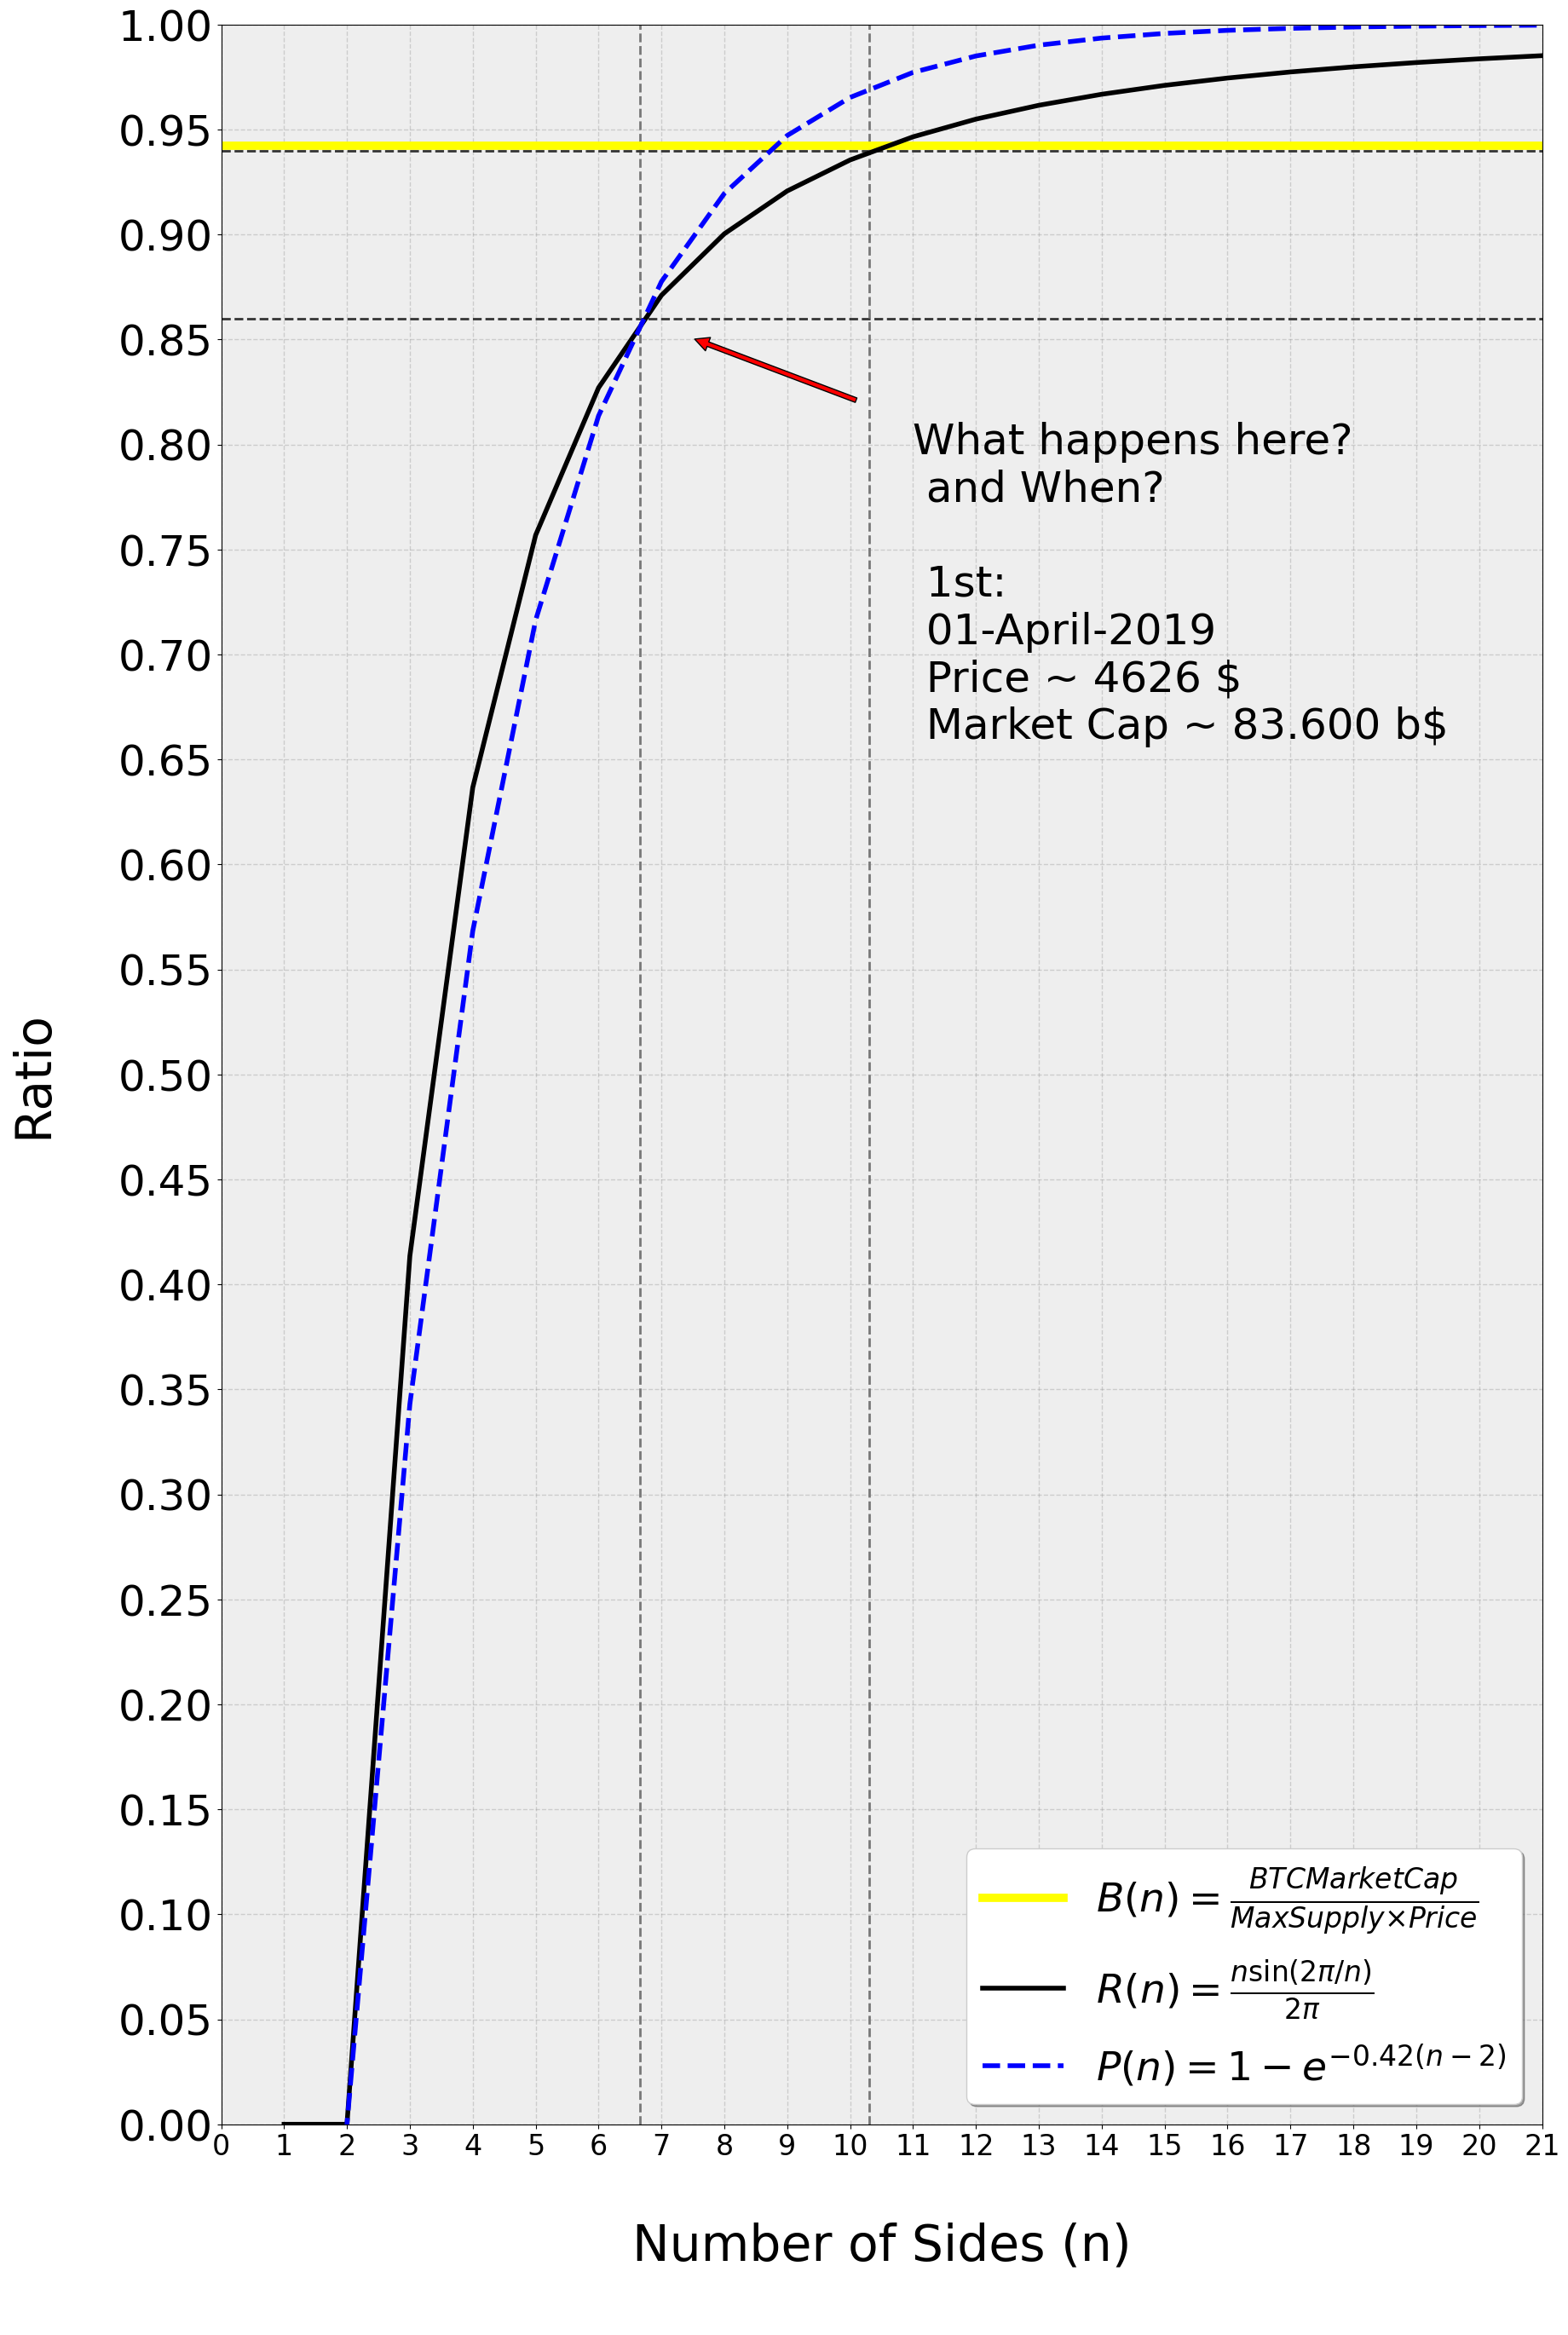

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import requests

# CoinMarketCap API configuration
API_KEY = "b50cafca-9890-4eed-bc7b-a893e0d71cbc"  # Replace with your API key
URL = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest"

# Parameters for the API request
PARAMS = {
    "symbol": "BTC",
}

# Headers with API Key
HEADERS = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": API_KEY,
}

# Function to fetch BTC market cap
def fetch_btc_market_cap():
    try:
        response = requests.get(URL, headers=HEADERS, params=PARAMS)
        response.raise_for_status()  # Raise an error for HTTP codes 4xx or 5xx
        
        data = response.json()
        btc_data = data["data"]["BTC"]
        market_cap = btc_data["quote"]["USD"]["market_cap"]
        price = btc_data["quote"]["USD"]["price"]
        
        print(f"Bitcoin Market Cap: ${market_cap:,.2f}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
    except KeyError:
        print("Unexpected response structure:", response.text)

    Output = market_cap/price

    return Output

# Call the function
M = fetch_btc_market_cap()


# Define the function R(n) - Ratio of polygon area to circle area
def R(n):
    return (n * np.sin(2 * np.pi / n)) / (2 * np.pi)

# Define function Q(n) - Approximation 1
def Q(n):
    return n / ((2 * np.sqrt(2) * np.pi - 8) + n)

# Define function P(n) - Exponential approximation
def P41(n, k=0.41, n0=2):
    return 1 - 0.9*np.exp(-k * (n - n0))

def P42(n, k=0.42, n0=2):
    return 1 - np.exp(-k * (n - n0))

def P43(n, k=0.43, n0=2):
    return 1 - 1.1*np.exp(-k * (n - n0))

# Generate values for n
n_values = np.arange(0, 22)  # Start from 3 (minimum polygon sides: triangle)

# Compute values for each function
R_values = R(n_values)

P41_values = P41(n_values)
P42_values = P42(n_values)
P43_values = P43(n_values)

Q_values = Q(n_values)

# Plotting
plt.figure(figsize=(20, 32))

# ?
plt.axhline(y=0.86, color='#343434', linestyle='--', linewidth=2)
# plt.axhline(y=0.963, color='#343434', linestyle='--', linewidth=2)
plt.axvline(x=6.66, color='#787878', linestyle='--', linewidth=2)

plt.axhline(y=0.94, color='#343434', linestyle='--', linewidth=2)
plt.axvline(x=10.3, color='#787878', linestyle='--', linewidth=2)

plt.axhline(y=((M)/21000000), color='yellow', linewidth=7, label=r'$B(n) = \frac{BTC Market Cap}{Max Supply × Price}$')


# Plot R(n)
plt.plot(n_values, R_values, label=r'$R(n) = \frac{n \sin(2\pi/n)}{2\pi}$', color='black', linewidth=4)

# Plot P(n) (Exponential approximation)
# plt.plot(n_values, P41_values, label=r'$P(n) = 1 - 0.9×e^{-0.41(n-2)}$', color='red', linestyle='--', linewidth=4)
plt.plot(n_values, P42_values, label=r'$P(n) = 1 - e^{-0.42(n-2)}$', color='blue', linestyle='--', linewidth=4)
# plt.plot(n_values, P43_values, label=r'$P(n) = 1 - 1.1×e^{-0.43(n-2)}$', color='green', linestyle='--', linewidth=4)


# Plot Q(n) (Approximation 1)
# plt.plot(n_values, Q_values, label=r'$Q(n) = \frac{n}{(2\sqrt{2}\pi - 8) + n}$', color='green', linestyle='-.')

# Add reference lines

# plt.axhline(y=(2 * np.sqrt(2) / np.pi), color='red', linestyle='--', label=r'$R(4) = \frac{2\sqrt{2}}{\pi}$', linewidth=1.5)

# Chart customization
# plt.title('Ratio of the Area of Polygon to Area of Circle\n & \n BTC Supply\n', fontsize=52)
plt.xlabel('\nNumber of Sides (n)\n', fontsize=42)
plt.ylabel('Ratio\n', fontsize=42)
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.3)
plt.xlim(3, 21)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 22, 1), fontsize=24)
plt.yticks(np.linspace(0, 1, 21), fontsize=36)
plt.legend(fontsize=34, shadow=True)

plt.annotate('What happens here?\n and When?\n\n 1st:\n 01-April-2019\n Price ~ 4626 $\n Market Cap ~ 83.600 b$ ', fontsize=36, xy=(6.66, 0.86), xytext=(11, 0.66), arrowprops=dict(facecolor='red', shrink=0.2))
# Set background color
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('#eeeeee')

# Save and display the plot
plt.savefig('playgon', dpi=100)
plt.show()



